In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_table('./data/GDA20z50_DEM9s_NPB-AoI.xyz',
                skiprows=0,
                delim_whitespace=True,
                names=['x', 'y', 'elevation'])

In [4]:
df.head()

,x,y,elevation
0,313440.618085,6.800458e+06,230.962997
1,313677.096019,6.800458e+06,233.854095
2,313913.573953,6.800458e+06,238.395996
3,314150.051887,6.800458e+06,243.541794
4,314386.529822,6.800458e+06,247.499603


In [5]:
df.describe()

,x,y,elevation
count,381195.000000,3.811950e+05,381195.000000
mean,359080.859390,6.662242e+06,-747.795758
std,26418.617357,7.988030e+04,2950.995613
min,313440.618085,6.524026e+06,-9999.000000
25%,336142.499770,6.593134e+06,73.408688
50%,359080.859390,6.662242e+06,202.737595
75%,382019.219010,6.731350e+06,259.984497
max,404721.100695,6.800458e+06,408.144501


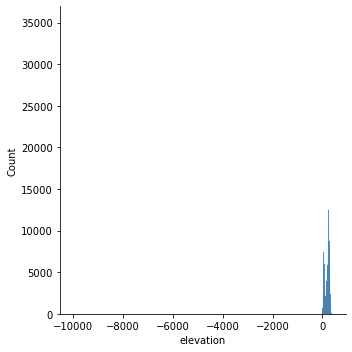

In [6]:
sns.displot(df.elevation)

In [7]:
extent = x_min, x_max, y_min, y_max = [df.x.min(), df.x.max(),
                                       df.y.min(), df.y.max()]

In [8]:
x_max

404721.1006951586

In [10]:
clean_df = df[df['elevation'] != -9999].copy()

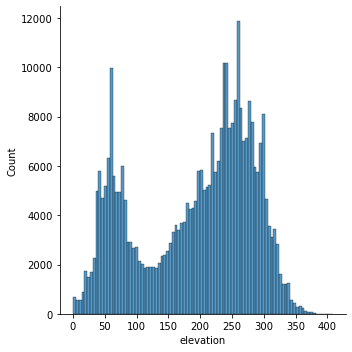

In [11]:
sns.displot(clean_df.elevation)

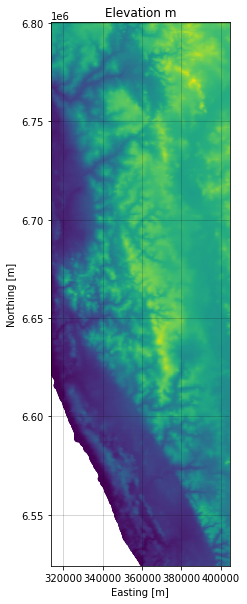

In [13]:
fig, ax = plt.subplots(figsize=(8,10))

ax.scatter(clean_df.x, clean_df.y, c=clean_df.elevation)
ax.set_aspect(1)
ax.set_xlim(*extent[:2])
ax.set_ylim(*extent[2:])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('Elevation m')
ax.grid(c='k', alpha=0.2)


plt.show()

In [19]:
x = np.array(df['x'])
y = np.array(df['y'])
z = np.array(df['elevation'])

m = len(np.unique(y))
n = len(np.unique(x))

In [20]:
print(m, n)

985 387


In [22]:
print(y)

[6800457.81405613 6800457.81405613 6800457.81405613 ... 6524025.50050428
 6524025.50050428 6524025.50050428]


In [27]:
grid_y = np.reshape(y, (m, n))

In [28]:
print(grid_y)

[[6800457.81405613 6800457.81405613 6800457.81405613 ... 6800457.81405613
  6800457.81405613 6800457.81405613]
 [6800176.88690821 6800176.88690821 6800176.88690821 ... 6800176.88690821
  6800176.88690821 6800176.88690821]
 [6799895.95976029 6799895.95976029 6799895.95976029 ... 6799895.95976029
  6799895.95976029 6799895.95976029]
 ...
 [6524587.35480011 6524587.35480011 6524587.35480011 ... 6524587.35480011
  6524587.35480011 6524587.35480011]
 [6524306.4276522  6524306.4276522  6524306.4276522  ... 6524306.4276522
  6524306.4276522  6524306.4276522 ]
 [6524025.50050428 6524025.50050428 6524025.50050428 ... 6524025.50050428
  6524025.50050428 6524025.50050428]]


In [29]:
grid_x = np.reshape(x, (m, n))

In [30]:
grid_x

array([[313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       ...,
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516],
       [313440.61808481, 313677.09601903, 313913.57395326, ...,
        404248.14482671, 404484.62276093, 404721.10069516]])

In [37]:
grid_z = np.reshape(z, (m, n))
grid_z[grid_z == -9999] = 0

In [38]:
grid_z

array([[230.96299744, 233.85409546, 238.39599609, ..., 299.84890747,
        299.21630859, 298.92910767],
       [216.71279907, 217.42179871, 223.77160645, ..., 299.54568481,
        299.1098938 , 298.8494873 ],
       [219.94050598, 219.79330444, 218.37229919, ..., 299.27539062,
        299.05758667, 298.78659058],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 168.58729553,
        179.89570618, 179.3493042 ],
       [  0.        ,   0.        ,   0.        , ..., 161.17129517,
        169.24029541, 171.35519409],
       [  0.        ,   0.        ,   0.        , ..., 151.11450195,
        156.14390564, 160.17720032]])

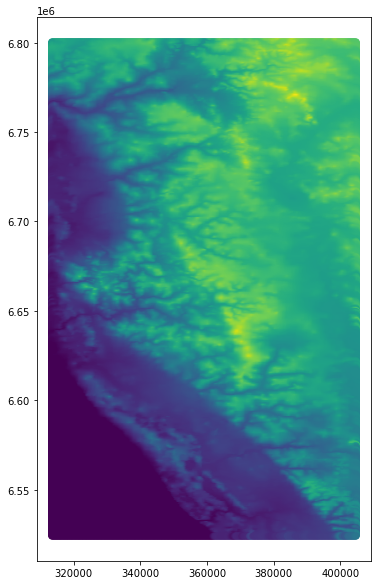

In [41]:
plt.figure(figsize=(6, 10))
plt.scatter(grid_x, grid_y, c=grid_z)

In [43]:
from scipy.interpolate import Rbf

rbfi = Rbf(clean_df.x, clean_df.y, clean_df.elevation)

# di = rbfi(grid_x, grid_y)

MemoryError: Unable to allocate 446. GiB for an array with shape (59863709136,) and data type float64

In [ ]:
mi = np.min(np.hstack([di.ravel(), df.por.values]))
ma = np.max(np.hstack([di.ravel(), df.por.values]))